In [4]:
from parfamwrapper import ParFamWrapper

import sympy
import torch
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Collection of function for ParFam to use, can be readily extended

function_dict = {'sqrt': lambda x: torch.sqrt(torch.abs(x)),
                 'exp': lambda x: torch.minimum(torch.exp(x), np.exp(10) + torch.abs(x)),
                 'log': lambda x: torch.log(torch.abs(x) + 0.000001),
                 'cos': torch.cos, 'sin': torch.sin}
function_name_dict = {'sqrt': lambda x: sympy.sqrt(sympy.Abs(x)), 'exp': sympy.exp, 'cos': sympy.cos, 'sin': sympy.sin,
                      'log': lambda x: sympy.log(sympy.Abs(x) + 0.000001)}

standard_function_names_str = ['sin', 'sqrt', 'exp', 'sqrt'] 
standard_functions = [function_dict[key] for key in standard_function_names_str]
standard_function_names = [function_name_dict[key] for key in standard_function_names_str]

# Basic functionality

## One dimensional problem

In [6]:
device = 'cpu'

a = 2 * torch.randn(1)

x = np.arange(1, 5, 0.2)  # 1 dimensional 
x = x.reshape(len(x), 1)  # 1 dimensional 
print(x.shape) 
x = torch.tensor(x, device=device)

def func(a, x, module):
    # return module.sin((a[0] * x + 1) / (0.1 * x + 2))
    # return module.sin((a[0] * x + 1) / (0.1 * x)) 
    # return module.sin((a[0] * x)) 
    # return a[0] * x / (1+x)
    return 0.2 * module.sin(a[0] * x) / x
    # return 0.5 * x / (x + 1)
    # return module.log(x + 1.4) + module.log(x ** 2 + 1.3)
    # return module.sin(x ** 2) * module.cos(x) - 1

y = func(a, x, np).squeeze(1)
x_sym = sympy.symbols('x')

target_expr = func(a, x_sym, sympy)
print(f'Target formula: {target_expr}')

(20, 1)
Target formula: 0.2*sin(0.0922609269618988*x)/x


In [7]:
# Assuming we already know that only the sin function is necessary:
functions = [torch.sin]
function_names = [sympy.sin]

In [8]:
# The config picks defines all the model and training parameter choices. See config_files/wrapper. 'small' is the default. For bigger experiments, for example those in SRBench, choose 'big'.
# Every additional variable overwrites the settings in the config. E.g., we restrict the functions we use to being simply the sin function.
parfam = ParFamWrapper(config_name='small', iterate=True, functions=functions, function_names=function_names)
parfam.fit(x, y, time_limit=100)  # time_limit is in seconds, might have to be higher for higher dimensions and more complicated parametric families

/home/math/scholl/projects/physicalLawLearning/parfam/train.py:1632: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, device=training_parameters['device']), torch.tensor(y, device=training_parameters['device'])
INFO:root:Sequential computation
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 2, 'degree_output_denominator': 0, 'degree_input_denominator': 0, 'function_names': [], 'width': 1, 'functions': [], 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 3
INFO:root:Number parameters active: 3


Training parameters: {'normalization': False, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_dataset_length': 20, 'model': 'ParFamTorch', 'target_noise': 0.0, 'feature_noise': 0.0, 'seed': 1234, 'accuracy': 0.0001, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'pruning_iterations': 1, 'pruning_cut_off': 0.01, 'classifier': None, 'local_minimizer': 'BFGS', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.001, 'repetitions': 1, 'parallel': False, 'n_processes': 4, 'lambda_1_cut': 0, 'lambda_1_piecewise': 0, 'device': 'cpu', 'iterative_finetuning': True, 'max_n_active_parameters': 10, 'lambda_1_finetuning': 1e-05, 'path_pretrained': 'Flexible dimension/full_19_big_training_sets/20240427_070711_5M/Datetime_20240427_070717_Loss_training_set_size_797545_batch_size_341_hidden_dim_256.pt', 'topk_predictions': 10, 'enforce_function_iterate': 'False'}
Sequential computation
##### Training #####
Number parameters: 3
Number parameters active: 3


INFO:root:Number of evaluations: 712
INFO:root:Relative l2 distance train: 0.000732251937132936
INFO:root:Relative l2 distance validation: 0.0012345963500160944
INFO:root:Training time: 0.19450640678405762
INFO:root:Cumulative training time: 0.19703388214111328
INFO:root:Cumulative number of evaluations: 712
INFO:root:New best relative l2 distance validation: 0.0012345963500160944
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 1, 'degree_output_denominator': 1, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 4
INFO:root:Number parameters active: 4


Training time: 0.19450640678405762
Target expression: None
Relative l_2-distance train: 0.000732251937132936
Relative l_2-distance validation: 0.0012345963500160944
##### Training #####
Number parameters: 4
Number parameters active: 4


INFO:root:Number of evaluations: 2087
INFO:root:Relative l2 distance train: 0.4841033518183892
INFO:root:Relative l2 distance validation: 0.5475760989391464
INFO:root:Training time: 0.6803522109985352
INFO:root:Cumulative training time: 0.8787221908569336
INFO:root:Cumulative number of evaluations: 2799
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 2, 'degree_output_denominator': 1, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 5
INFO:root:Number parameters active: 5


Training time: 0.6803522109985352
Target expression: None
Relative l_2-distance train: 0.4841033518183892
Relative l_2-distance validation: 0.5475760989391464
##### Training #####
Number parameters: 5
Number parameters active: 5


INFO:root:Number of evaluations: 1898
INFO:root:Relative l2 distance train: 0.05967455767987764
INFO:root:Relative l2 distance validation: 0.0789699609947599
INFO:root:Training time: 0.6200611591339111
INFO:root:Cumulative training time: 1.50014328956604
INFO:root:Cumulative number of evaluations: 4697
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 5
INFO:root:Number parameters active: 5


Training time: 0.6200611591339111
Target expression: None
Relative l_2-distance train: 0.05967455767987764
Relative l_2-distance validation: 0.0789699609947599
##### Training #####
Number parameters: 5
Number parameters active: 5


INFO:root:Number of evaluations: 1366
INFO:root:Relative l2 distance train: 0.00042718391016134845
INFO:root:Relative l2 distance validation: 0.0006257447632730634
INFO:root:Training time: 0.5482444763183594
INFO:root:Cumulative training time: 2.0499908924102783
INFO:root:Cumulative number of evaluations: 6063
INFO:root:New best relative l2 distance validation: 0.0006257447632730634
INFO:root:Terminate proccess, wanted accuracy 0.001 and number of active parameters 3 / 10 was reached
INFO:root:Time for multiprocessing in total: 2.0574092864990234
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Best distance (train, val, test): (tensor

Training time: 0.5482444763183594
Target expression: None
Relative l_2-distance train: 0.00042718391016134845
Relative l_2-distance validation: 0.0006257447632730634
Terminate proccess, wanted accuracy 0.001 and number of active parameters 3 / 10 was reached


In [9]:
print(f'Target formula: {target_expr}')
print(f'Computed formula: {parfam.formula_reduced.simplify()}')

Target formula: 0.2*sin(0.0922609269618988*x)/x
Computed formula: 0.006*x0 - 1.157*sin(0.008*x0 - 0.882) - 0.875


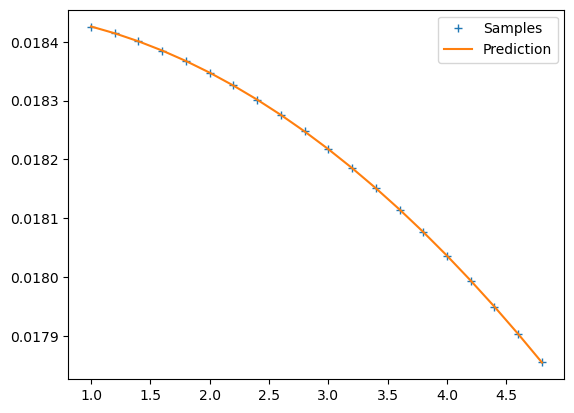

Relative l2 distance: 5.170813453957574e-06


In [10]:
y_pred = parfam.predict(x).cpu().detach().numpy()
plt.plot(x, y, '+', label='Samples')
plt.plot(x, y_pred, label='Prediction')
plt.legend()
plt.show()

print(f'Relative l2 distance: {np.linalg.norm(y - y_pred, ord=2) / np.linalg.norm(y, ord=2)}')


## 2 dimensional problem

In [11]:
a = 2 * torch.randn(1)
x = np.sort(np.random.uniform(-1.2, 5, 100))
x = np.random.uniform(-3, 3, 200).reshape(100, 2)
print(x.shape)
x = torch.tensor(x, device=device)

def func(a, x, module):
    return module.sin(x[0]) * x[1]


y = func(a, x.T, np)
x_sym = []
for i in range(x.shape[1]):
    x_sym.append(sympy.symbols(f'x{i}'))
target_expr = func(a, x_sym, sympy)
print(f'Target formula: {target_expr}')

(100, 2)
Target formula: x1*sin(x0)


In [12]:
# Assuming we already know that only the sin function is necessary:
functions = [torch.sin]
function_names = [sympy.sin]

In [13]:
parfam = ParFamWrapper(iterate=True, functions=functions, function_names=function_names, degree_input_denominator=0, degree_output_denominator=0)
parfam.fit(x, y, time_limit=100)

/home/math/scholl/projects/physicalLawLearning/parfam/train.py:1632: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, device=training_parameters['device']), torch.tensor(y, device=training_parameters['device'])
INFO:root:Sequential computation
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 2, 'degree_output_denominator': 0, 'degree_input_denominator': 0, 'function_names': [], 'width': 1, 'functions': [], 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 6
INFO:root:Number parameters active: 6
INFO:root:Number of evaluations: 200
INFO:root:Relative l2 distance train: 0.5690579841034251
INFO:root:Relative l2 distance validation: 0.6784908353482222
INFO

Training parameters: {'normalization': False, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_dataset_length': 100, 'model': 'ParFamTorch', 'target_noise': 0.0, 'feature_noise': 0.0, 'seed': 1234, 'accuracy': 0.0001, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'pruning_iterations': 1, 'pruning_cut_off': 0.01, 'classifier': None, 'local_minimizer': 'BFGS', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.001, 'repetitions': 1, 'parallel': False, 'n_processes': 4, 'lambda_1_cut': 0, 'lambda_1_piecewise': 0, 'device': 'cpu', 'iterative_finetuning': True, 'max_n_active_parameters': 10, 'lambda_1_finetuning': 1e-05, 'path_pretrained': 'Flexible dimension/full_19_big_training_sets/20240427_070711_5M/Datetime_20240427_070717_Loss_training_set_size_797545_batch_size_341_hidden_dim_256.pt', 'topk_predictions': 10, 'enforce_function_iterate': 'False'}
Sequential computation
##### Training #####
Number parameters: 6
Number parameters active: 6
Training time: 0.06549215

INFO:root:Number of evaluations: 277
INFO:root:Relative l2 distance train: 0.8638941648222552
INFO:root:Relative l2 distance validation: 1.0674714158508152
INFO:root:Training time: 0.11748671531677246
INFO:root:Cumulative training time: 0.18630552291870117
INFO:root:Cumulative number of evaluations: 477
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 10
INFO:root:Number parameters active: 10


Training time: 0.11748671531677246
Target expression: None
Relative l_2-distance train: 0.8638941648222552
Relative l_2-distance validation: 1.0674714158508152
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 615
INFO:root:Relative l2 distance train: 0.8978929244860187
INFO:root:Relative l2 distance validation: 1.1173049372256418
INFO:root:Training time: 0.25736141204833984
INFO:root:Cumulative training time: 0.44507765769958496
INFO:root:Cumulative number of evaluations: 1092
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 12
INFO:root:Number parameters active: 12


Training time: 0.25736141204833984
Target expression: None
Relative l_2-distance train: 0.8978929244860187
Relative l_2-distance validation: 1.1173049372256418
##### Training #####
Number parameters: 12
Number parameters active: 12


INFO:root:Number of evaluations: 2131
INFO:root:Relative l2 distance train: 4.617569426005576e-08
INFO:root:Relative l2 distance validation: 4.4911296927552924e-08
INFO:root:Training time: 1.2129127979278564
INFO:root:Cumulative training time: 1.6593613624572754
INFO:root:Cumulative number of evaluations: 3223
INFO:root:New best relative l2 distance validation: 4.4911296927552924e-08
INFO:root:Terminate proccess, wanted accuracy 0.001 and number of active parameters 2 / 10 was reached
INFO:root:Time for multiprocessing in total: 1.6662180423736572
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not c

Training time: 1.2129127979278564
Target expression: None
Relative l_2-distance train: 4.617569426005576e-08
Relative l_2-distance validation: 4.4911296927552924e-08
Terminate proccess, wanted accuracy 0.001 and number of active parameters 2 / 10 was reached


In [14]:
print(f'Target formula: {target_expr}')
print(f'Computed formula: {parfam.formula_reduced.simplify()}')


Target formula: x1*sin(x0)
Computed formula: 1.0*x1*sin(1.0*x0)


In [15]:
y_pred = parfam.predict(x).cpu().detach().numpy()
print(f'Relative l2 distance: {np.linalg.norm(y - y_pred, ord=2) / np.linalg.norm(y, ord=2)}')

Relative l2 distance: 3.405488039384396e-08


# More complicated functions

Test now the feynman formula III 10 19:
$$mom\sqrt{x^2+y^2+z^2}$$

In [16]:
n_datapoints = 500
dim = 4
x = np.random.uniform(1, dim, n_datapoints * dim).reshape(n_datapoints, dim)
print(x.shape)
x = torch.tensor(x, device=device)

def func(x, module):
    # return x[0] * (x[1]*(x[2]**2 + x[3]**2 + x[4]**2))**(1/2)
    return x[0] * ((x[2]**2 + x[3]**2 + x[1]**2))**(1/2)


y = func(x.T, np)
# x_sym = [sympy.symbols(symbol) for symbol in ['mom', 'B', 'x', 'y', 'z']]
x_sym = [sympy.symbols(symbol) for symbol in ['mom', 'x', 'y', 'z']]
# for i in range(x.shape[1]):
#     x_sym.append(sympy.symbols(f'x{i}'))
target_expr = func(x_sym, sympy)
print(f'Target formula: {target_expr}')

(500, 4)
Target formula: mom*(x**2 + y**2 + z**2)**0.5


In [17]:
# Assuming we already know that only the sqrt function is necessary.
# If we do not assume this knowledge, we could also just use the variable standard_functions and standard_function_names instead, it just takes more time.
# Do not define the sqrt here yourself by just defining it as torch.sqrt, since it is not defined on all reals, which is a problem for the optimizer. Thus, see how it was defined in the function_dict.  
functions = [function_dict['sqrt']]
function_names = [function_name_dict['sqrt']]

In [18]:
# ParFamWrapper with its most important input parameters
parfam = ParFamWrapper(iterate=True, # iterate through multiple different parametric families (costs more time, but is the better choice when one is not sure about the degrees and the functions of the target formula)
                       functions=functions, function_names=function_names, # which functions to use 
                       degree_input_numerator=2, degree_output_numerator=3, degree_input_denominator=0, degree_output_denominator=0,  # the maximal degrees of the polynomials in the parametric family
                       input_names=x_sym,  # the names of the input variables
                       enforce_function=False,  # has only an effect, if iterate=False
                       device='cpu', 
                       separate_test_set=True  # ParFam uses a smaller set for training, to use a part of it as a test set afterwards
                       )
parfam.fit(x, y, time_limit=100, seed=1234)  # If we cannot assume that degree_input_denominator=0 and degree_output_denominator=0 holds, we would have to increase the time limit

/home/math/scholl/projects/physicalLawLearning/parfam/train.py:1632: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, device=training_parameters['device']), torch.tensor(y, device=training_parameters['device'])
INFO:root:Sequential computation
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 3, 'degree_output_denominator': 0, 'degree_input_denominator': 0, 'function_names': [], 'width': 1, 'functions': [], 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 35
INFO:root:Number parameters active: 35


Training parameters: {'normalization': False, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_dataset_length': 500, 'model': 'ParFamTorch', 'target_noise': 0.0, 'feature_noise': 0.0, 'seed': 1234, 'accuracy': 0.0001, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'pruning_iterations': 1, 'pruning_cut_off': 0.01, 'classifier': None, 'local_minimizer': 'BFGS', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.001, 'repetitions': 1, 'parallel': False, 'n_processes': 4, 'lambda_1_cut': 0, 'lambda_1_piecewise': 0, 'device': 'cpu', 'iterative_finetuning': True, 'max_n_active_parameters': 10, 'lambda_1_finetuning': 1e-05, 'path_pretrained': 'Flexible dimension/full_19_big_training_sets/20240427_070711_5M/Datetime_20240427_070717_Loss_training_set_size_797545_batch_size_341_hidden_dim_256.pt', 'topk_predictions': 10, 'enforce_function_iterate': 'False'}
Sequential computation
##### Training #####
Number parameters: 35
Number parameters active: 35


INFO:root:Number of evaluations: 1923
INFO:root:Relative l2 distance train: 0.004558680468408374
INFO:root:Relative l2 distance validation: 0.007646561911086443
INFO:root:Training time: 0.8118729591369629
INFO:root:Cumulative training time: 0.8146424293518066
INFO:root:Cumulative number of evaluations: 1923
INFO:root:New best relative l2 distance validation: 0.007646561911086443
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 11
INFO:root:Number parameters active: 11


Training time: 0.8118729591369629
Target expression: None
Relative l_2-distance train: 0.004558680468408374
Relative l_2-distance validation: 0.007646561911086443
##### Training #####
Number parameters: 11
Number parameters active: 11


INFO:root:Number of evaluations: 1043
INFO:root:Relative l2 distance train: 0.1441351943974871
INFO:root:Relative l2 distance validation: 0.16250724664670532
INFO:root:Training time: 0.48293423652648926
INFO:root:Cumulative training time: 1.2991211414337158
INFO:root:Cumulative number of evaluations: 2966
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 0.48293423652648926
Target expression: None
Relative l_2-distance train: 0.1441351943974871
Relative l_2-distance validation: 0.16250724664670532
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 1942
INFO:root:Relative l2 distance train: 0.09915537450351226
INFO:root:Relative l2 distance validation: 0.13571817435992423
INFO:root:Training time: 0.939211368560791
INFO:root:Cumulative training time: 2.2403948307037354
INFO:root:Cumulative number of evaluations: 4908
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 25
INFO:root:Number parameters active: 25


Training time: 0.939211368560791
Target expression: None
Relative l_2-distance train: 0.09915537450351226
Relative l_2-distance validation: 0.13571817435992423
##### Training #####
Number parameters: 25
Number parameters active: 25


INFO:root:Number of evaluations: 1681
INFO:root:Relative l2 distance train: 0.021842611548117216
INFO:root:Relative l2 distance validation: 0.030086924968384873
INFO:root:Training time: 1.471256971359253
INFO:root:Cumulative training time: 3.71380877494812
INFO:root:Cumulative number of evaluations: 6589
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 35
INFO:root:Number parameters active: 35


Training time: 1.471256971359253
Target expression: None
Relative l_2-distance train: 0.021842611548117216
Relative l_2-distance validation: 0.030086924968384873
##### Training #####
Number parameters: 35
Number parameters active: 35


INFO:root:Number of evaluations: 3650
INFO:root:Relative l2 distance train: 0.00010405827929379963
INFO:root:Relative l2 distance validation: 0.00011309275779543814
INFO:root:Training time: 3.2585105895996094
INFO:root:Cumulative training time: 6.974799633026123
INFO:root:Cumulative number of evaluations: 10239
INFO:root:New best relative l2 distance validation: 0.00011309275779543814
INFO:root:Terminate proccess, wanted accuracy 0.001 and number of active parameters 4 / 10 was reached
INFO:root:Time for multiprocessing in total: 6.982349872589111
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.


Training time: 3.2585105895996094
Target expression: None
Relative l_2-distance train: 0.00010405827929379963
Relative l_2-distance validation: 0.00011309275779543814
Terminate proccess, wanted accuracy 0.001 and number of active parameters 4 / 10 was reached


INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Best distance (train, val, test): (tensor(0.0001, dtype=torch.float64), tensor(0.0001, dtype=torch.float64), tensor(0.0001, dtype=torch.float64))
INFO:root:Best formula: 0.004*x0*x1 - 0.001*x0*x2 + 0.004*x0*x3 + 0.978*x0*sqrt(Abs(0.001*x0*x2 + 0.002*x0*x3 - 0.001*x0 + 1.037*x1**2 - 0.004*x1*x3 + 1.043*x2**2 + 0.001*x2*x3 + 1.034*x3**2 + 0.001*x3 - 0.004)) + 0.001*x0 + 0.003*x1**2 + 0.001*x1*x3 - 0.003*x1*sqrt(Abs(0.001*x0*x2 + 0.002*x0*x3 - 0.001*x0 + 1.037*x1**2 - 0.004*x1*x3 + 1.043*x2**2 + 0.001*x2*x3 + 1.034*x3**2 + 0.001*x3 - 0.004)) + 0.001*x2**2 + 0.003*x3**2 - 0.002*x3*sqrt(Abs(0.001*x0*x2 + 0.002*x0*x3 - 0.001*x0 + 1.037*x1**2 - 0.004*x1*x3 + 1.043*x2**2 + 0.001*x2*x3 + 1.034*x3**2 + 0.001*x3 - 0.004)) - 0.002*x3 best training time: 3.2585105895996094


In [19]:
print(f'Target formula: {target_expr}')
print(f'Computed formula: {parfam.formula_reduced.simplify()}')

Target formula: mom*(x**2 + y**2 + z**2)**0.5
Computed formula: 0.999946538070911*x0*sqrt(Abs(x1**2 + x2**2 + x3**2))


In [20]:
y_pred = parfam.predict(x).cpu().detach().numpy()
print(f'Relative l2 distance: {np.linalg.norm(y - y_pred, ord=2) / np.linalg.norm(y, ord=2)}')

Relative l2 distance: 3.427624413780228e-08


In [21]:
# If one has more time, one can also simply use the 'big' configuration (config_files/wrapper/big.ini) in the following way
parfam = ParFamWrapper(iterate=True, config_name='big')
parfam.fit(x, y, seed=1234, time_limit=500)

/home/math/scholl/projects/physicalLawLearning/parfam/train.py:1632: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, device=training_parameters['device']), torch.tensor(y, device=training_parameters['device'])
INFO:root:Sequential computation
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 4, 'degree_output_denominator': 0, 'degree_input_denominator': 0, 'function_names': [], 'width': 1, 'functions': [], 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 66
INFO:root:Number parameters active: 66


Training parameters: {'normalization': False, 'time_limit': 500, 'evaluations_limit': 1000000, 'max_dataset_length': 500, 'model': 'ParFamTorch', 'target_noise': 0.0, 'feature_noise': 0.0, 'seed': 1234, 'accuracy': 0.0001, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'pruning_iterations': 1, 'pruning_cut_off': 0.01, 'classifier': None, 'local_minimizer': 'BFGS', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.001, 'repetitions': 1, 'parallel': False, 'n_processes': 4, 'lambda_1_cut': 0, 'lambda_1_piecewise': 0.0, 'device': 'cpu', 'iterative_finetuning': True, 'max_n_active_parameters': 10, 'lambda_1_finetuning': 1e-05, 'path_pretrained': 'Flexible dimension/full_19_big_training_sets/20240427_070711_5M/Datetime_20240427_070717_Loss_training_set_size_797545_batch_size_341_hidden_dim_256.pt', 'topk_predictions': 3, 'enforce_function_iterate': 'Both'}
Sequential computation
##### Training #####
Number parameters: 66
Number parameters active: 66


INFO:root:Number of evaluations: 3317
INFO:root:Relative l2 distance train: 0.0020119228528878703
INFO:root:Relative l2 distance validation: 0.005193511368540645
INFO:root:Training time: 2.565164566040039
INFO:root:Cumulative training time: 2.5703089237213135
INFO:root:Cumulative number of evaluations: 3317
INFO:root:New best relative l2 distance validation: 0.005193511368540645
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 1, 'degree_output_denominator': 1, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 10
INFO:root:Number parameters active: 10


Training time: 2.565164566040039
Target expression: None
Relative l_2-distance train: 0.0020119228528878703
Relative l_2-distance validation: 0.005193511368540645
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 4274
INFO:root:Relative l2 distance train: 0.1251169127887042
INFO:root:Relative l2 distance validation: 0.16135444659586412
INFO:root:Training time: 1.5988874435424805
INFO:root:Cumulative training time: 4.170811414718628
INFO:root:Cumulative number of evaluations: 7591
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 2, 'degree_output_denominator': 1, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 20
INFO:root:Number parameters active: 20


Training time: 1.5988874435424805
Target expression: None
Relative l_2-distance train: 0.1251169127887042
Relative l_2-distance validation: 0.16135444659586412
##### Training #####
Number parameters: 20
Number parameters active: 20


INFO:root:Number of evaluations: 2940
INFO:root:Relative l2 distance train: 0.16980045973850486
INFO:root:Relative l2 distance validation: 0.2307846650914672
INFO:root:Training time: 1.1937453746795654
INFO:root:Cumulative training time: 5.3666839599609375
INFO:root:Cumulative number of evaluations: 10531
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 3, 'degree_output_denominator': 1, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 40
INFO:root:Number parameters active: 40


Training time: 1.1937453746795654
Target expression: None
Relative l_2-distance train: 0.16980045973850486
Relative l_2-distance validation: 0.2307846650914672
##### Training #####
Number parameters: 40
Number parameters active: 40


INFO:root:Number of evaluations: 2916
INFO:root:Relative l2 distance train: 0.019977279613446572
INFO:root:Relative l2 distance validation: 0.03429796020064968
INFO:root:Training time: 1.5343763828277588
INFO:root:Cumulative training time: 6.904010057449341
INFO:root:Cumulative number of evaluations: 13447
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 4, 'degree_output_denominator': 1, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 71
INFO:root:Number parameters active: 71


Training time: 1.5343763828277588
Target expression: None
Relative l_2-distance train: 0.019977279613446572
Relative l_2-distance validation: 0.03429796020064968
##### Training #####
Number parameters: 71
Number parameters active: 71


INFO:root:Number of evaluations: 3772
INFO:root:Relative l2 distance train: 0.0013074994761291072
INFO:root:Relative l2 distance validation: 0.0028642525845311738
INFO:root:Training time: 2.6328444480895996
INFO:root:Cumulative training time: 9.541714668273926
INFO:root:Cumulative number of evaluations: 17219
INFO:root:New best relative l2 distance validation: 0.0028642525845311738
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 1, 'degree_output_denominator': 2, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 20
INFO:root:Number parameters active: 20


Training time: 2.6328444480895996
Target expression: None
Relative l_2-distance train: 0.0013074994761291072
Relative l_2-distance validation: 0.0028642525845311738
##### Training #####
Number parameters: 20
Number parameters active: 20


INFO:root:Number of evaluations: 4306
INFO:root:Relative l2 distance train: 0.2118762130378455
INFO:root:Relative l2 distance validation: 0.5875276882358497
INFO:root:Training time: 1.7783243656158447
INFO:root:Cumulative training time: 11.32204556465149
INFO:root:Cumulative number of evaluations: 21525
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 2, 'degree_output_denominator': 2, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 30
INFO:root:Number parameters active: 30


Training time: 1.7783243656158447
Target expression: None
Relative l_2-distance train: 0.2118762130378455
Relative l_2-distance validation: 0.5875276882358497
##### Training #####
Number parameters: 30
Number parameters active: 30


INFO:root:Number of evaluations: 4024
INFO:root:Relative l2 distance train: 0.019729407189166742
INFO:root:Relative l2 distance validation: 0.021612847889201207
INFO:root:Training time: 1.799323558807373
INFO:root:Cumulative training time: 13.12382459640503
INFO:root:Cumulative number of evaluations: 25549
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 3, 'degree_output_denominator': 2, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 50
INFO:root:Number parameters active: 50


Training time: 1.799323558807373
Target expression: None
Relative l_2-distance train: 0.019729407189166742
Relative l_2-distance validation: 0.021612847889201207
##### Training #####
Number parameters: 50
Number parameters active: 50


INFO:root:Number of evaluations: 4273
INFO:root:Relative l2 distance train: 0.0012679280937788213
INFO:root:Relative l2 distance validation: 0.0022514103748550803
INFO:root:Training time: 2.7548251152038574
INFO:root:Cumulative training time: 15.881906032562256
INFO:root:Cumulative number of evaluations: 29822
INFO:root:New best relative l2 distance validation: 0.0022514103748550803
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 4, 'degree_output_denominator': 2, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 81
INFO:root:Number parameters active: 81


Training time: 2.7548251152038574
Target expression: None
Relative l_2-distance train: 0.0012679280937788213
Relative l_2-distance validation: 0.0022514103748550803
##### Training #####
Number parameters: 81
Number parameters active: 81


INFO:root:Number of evaluations: 4388
INFO:root:Relative l2 distance train: 0.0009482209316574031
INFO:root:Relative l2 distance validation: 0.0019336064397912332
INFO:root:Training time: 3.3916287422180176
INFO:root:Cumulative training time: 19.278654098510742
INFO:root:Cumulative number of evaluations: 34210
INFO:root:New best relative l2 distance validation: 0.0019336064397912332
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 1, 'degree_output_denominator': 3, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 40
INFO:root:Number parameters active: 40


Training time: 3.3916287422180176
Target expression: None
Relative l_2-distance train: 0.0009482209316574031
Relative l_2-distance validation: 0.0019336064397912332
##### Training #####
Number parameters: 40
Number parameters active: 40


INFO:root:Number of evaluations: 5288
INFO:root:Relative l2 distance train: 1.3505506796444555
INFO:root:Relative l2 distance validation: 2.4137504578738747
INFO:root:Training time: 2.9013516902923584
INFO:root:Cumulative training time: 22.182945728302002
INFO:root:Cumulative number of evaluations: 39498
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 2, 'degree_output_denominator': 3, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 50
INFO:root:Number parameters active: 50


Training time: 2.9013516902923584
Target expression: None
Relative l_2-distance train: 1.3505506796444555
Relative l_2-distance validation: 2.4137504578738747
##### Training #####
Number parameters: 50
Number parameters active: 50


INFO:root:Number of evaluations: 4713
INFO:root:Relative l2 distance train: 0.026515706660335744
INFO:root:Relative l2 distance validation: 1.137938375828238
INFO:root:Training time: 3.095998764038086
INFO:root:Cumulative training time: 25.282165050506592
INFO:root:Cumulative number of evaluations: 44211
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 3, 'degree_output_denominator': 3, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 70
INFO:root:Number parameters active: 70


Training time: 3.095998764038086
Target expression: None
Relative l_2-distance train: 0.026515706660335744
Relative l_2-distance validation: 1.137938375828238
##### Training #####
Number parameters: 70
Number parameters active: 70


INFO:root:Number of evaluations: 4900
INFO:root:Relative l2 distance train: 0.026064387349014798
INFO:root:Relative l2 distance validation: 0.0941035617573898
INFO:root:Training time: 3.7367067337036133
INFO:root:Cumulative training time: 29.02311372756958
INFO:root:Cumulative number of evaluations: 49111
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 4, 'degree_output_denominator': 3, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 101
INFO:root:Number parameters active: 101


Training time: 3.7367067337036133
Target expression: None
Relative l_2-distance train: 0.026064387349014798
Relative l_2-distance validation: 0.0941035617573898
##### Training #####
Number parameters: 101
Number parameters active: 101


INFO:root:Number of evaluations: 4687
INFO:root:Relative l2 distance train: 0.0008984058181796125
INFO:root:Relative l2 distance validation: 0.0014814163063079906
INFO:root:Training time: 4.334494352340698
INFO:root:Cumulative training time: 33.363773584365845
INFO:root:Cumulative number of evaluations: 53798
INFO:root:New best relative l2 distance validation: 0.0014814163063079906
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 11
INFO:root:Number parameters active: 11


Training time: 4.334494352340698
Target expression: None
Relative l_2-distance train: 0.0008984058181796125
Relative l_2-distance validation: 0.0014814163063079906
##### Training #####
Number parameters: 11
Number parameters active: 11


INFO:root:Number of evaluations: 1057
INFO:root:Relative l2 distance train: 0.17163321816100935
INFO:root:Relative l2 distance validation: 0.19671803211635597
INFO:root:Training time: 0.4913957118988037
INFO:root:Cumulative training time: 33.85682392120361
INFO:root:Cumulative number of evaluations: 54855
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 6
INFO:root:Number parameters active: 6


Training time: 0.4913957118988037
Target expression: None
Relative l_2-distance train: 0.17163321816100935
Relative l_2-distance validation: 0.19671803211635597
##### Training #####
Number parameters: 6
Number parameters active: 6


INFO:root:Number of evaluations: 801
INFO:root:Relative l2 distance train: 0.3592655931616052
INFO:root:Relative l2 distance validation: 0.341370124263279
INFO:root:Training time: 0.3359866142272949
INFO:root:Cumulative training time: 34.194305658340454
INFO:root:Cumulative number of evaluations: 55656
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 11
INFO:root:Number parameters active: 11


Training time: 0.3359866142272949
Target expression: None
Relative l_2-distance train: 0.3592655931616052
Relative l_2-distance validation: 0.341370124263279
##### Training #####
Number parameters: 11
Number parameters active: 11


INFO:root:Number of evaluations: 1279
INFO:root:Relative l2 distance train: 0.12969638854497045
INFO:root:Relative l2 distance validation: 0.15934735783683432
INFO:root:Training time: 0.5884697437286377
INFO:root:Cumulative training time: 34.78466558456421
INFO:root:Cumulative number of evaluations: 56935
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 6
INFO:root:Number parameters active: 6


Training time: 0.5884697437286377
Target expression: None
Relative l_2-distance train: 0.12969638854497045
Relative l_2-distance validation: 0.15934735783683432
##### Training #####
Number parameters: 6
Number parameters active: 6


INFO:root:Number of evaluations: 905
INFO:root:Relative l2 distance train: 2.5412881105625726
INFO:root:Relative l2 distance validation: 2.5805292084543883
INFO:root:Training time: 0.36510348320007324
INFO:root:Cumulative training time: 35.15131998062134
INFO:root:Cumulative number of evaluations: 57840
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 11
INFO:root:Number parameters active: 11


Training time: 0.36510348320007324
Target expression: None
Relative l_2-distance train: 2.5412881105625726
Relative l_2-distance validation: 2.5805292084543883
##### Training #####
Number parameters: 11
Number parameters active: 11


INFO:root:Number of evaluations: 1098
INFO:root:Relative l2 distance train: 0.13233632739707973
INFO:root:Relative l2 distance validation: 0.16745206229170756
INFO:root:Training time: 0.5618164539337158
INFO:root:Cumulative training time: 35.714760303497314
INFO:root:Cumulative number of evaluations: 58938
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 6
INFO:root:Number parameters active: 6


Training time: 0.5618164539337158
Target expression: None
Relative l_2-distance train: 0.13233632739707973
Relative l_2-distance validation: 0.16745206229170756
##### Training #####
Number parameters: 6
Number parameters active: 6


INFO:root:Number of evaluations: 1218
INFO:root:Relative l2 distance train: 0.16827044938400626
INFO:root:Relative l2 distance validation: 0.1958890545598913
INFO:root:Training time: 0.5449302196502686
INFO:root:Cumulative training time: 36.26119256019592
INFO:root:Cumulative number of evaluations: 60156
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 0.5449302196502686
Target expression: None
Relative l_2-distance train: 0.16827044938400626
Relative l_2-distance validation: 0.1958890545598913
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 2027
INFO:root:Relative l2 distance train: 0.05455425163361999
INFO:root:Relative l2 distance validation: 0.05106021744102862
INFO:root:Training time: 0.9811427593231201
INFO:root:Cumulative training time: 37.244229793548584
INFO:root:Cumulative number of evaluations: 62183
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 16
INFO:root:Number parameters active: 16


Training time: 0.9811427593231201
Target expression: None
Relative l_2-distance train: 0.05455425163361999
Relative l_2-distance validation: 0.05106021744102862
##### Training #####
Number parameters: 16
Number parameters active: 16


INFO:root:Number of evaluations: 1993
INFO:root:Relative l2 distance train: 0.4612084811389389
INFO:root:Relative l2 distance validation: 0.5829332195303617
INFO:root:Training time: 0.8359074592590332
INFO:root:Cumulative training time: 38.082000732421875
INFO:root:Cumulative number of evaluations: 64176
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 0.8359074592590332
Target expression: None
Relative l_2-distance train: 0.4612084811389389
Relative l_2-distance validation: 0.5829332195303617
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 2166
INFO:root:Relative l2 distance train: 0.02720208215682984
INFO:root:Relative l2 distance validation: 0.037065577132470044
INFO:root:Training time: 1.037590503692627
INFO:root:Cumulative training time: 39.121426582336426
INFO:root:Cumulative number of evaluations: 66342
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 16
INFO:root:Number parameters active: 16


Training time: 1.037590503692627
Target expression: None
Relative l_2-distance train: 0.02720208215682984
Relative l_2-distance validation: 0.037065577132470044
##### Training #####
Number parameters: 16
Number parameters active: 16


INFO:root:Number of evaluations: 1858
INFO:root:Relative l2 distance train: 2.513076690295075
INFO:root:Relative l2 distance validation: 2.864734850878621
INFO:root:Training time: 0.782524585723877
INFO:root:Cumulative training time: 39.905760288238525
INFO:root:Cumulative number of evaluations: 68200
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 0.782524585723877
Target expression: None
Relative l_2-distance train: 2.513076690295075
Relative l_2-distance validation: 2.864734850878621
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 2196
INFO:root:Relative l2 distance train: 0.18758886387167295
INFO:root:Relative l2 distance validation: 0.20500108445707788
INFO:root:Training time: 1.1582510471343994
INFO:root:Cumulative training time: 41.066004037857056
INFO:root:Cumulative number of evaluations: 70396
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 16
INFO:root:Number parameters active: 16


Training time: 1.1582510471343994
Target expression: None
Relative l_2-distance train: 0.18758886387167295
Relative l_2-distance validation: 0.20500108445707788
##### Training #####
Number parameters: 16
Number parameters active: 16


INFO:root:Number of evaluations: 2366
INFO:root:Relative l2 distance train: 2.715701061460157
INFO:root:Relative l2 distance validation: 2.665294339457989
INFO:root:Training time: 1.1060259342193604
INFO:root:Cumulative training time: 42.17376661300659
INFO:root:Cumulative number of evaluations: 72762
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 16
INFO:root:Number parameters active: 16


Training time: 1.1060259342193604
Target expression: None
Relative l_2-distance train: 2.715701061460157
Relative l_2-distance validation: 2.665294339457989
##### Training #####
Number parameters: 16
Number parameters active: 16


INFO:root:Number of evaluations: 3077
INFO:root:Relative l2 distance train: 0.07658960837617432
INFO:root:Relative l2 distance validation: 0.08905291066728487
INFO:root:Training time: 1.7477095127105713
INFO:root:Cumulative training time: 43.92375087738037
INFO:root:Cumulative number of evaluations: 75839
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 11
INFO:root:Number parameters active: 11


Training time: 1.7477095127105713
Target expression: None
Relative l_2-distance train: 0.07658960837617432
Relative l_2-distance validation: 0.08905291066728487
##### Training #####
Number parameters: 11
Number parameters active: 11


INFO:root:Number of evaluations: 3534
INFO:root:Relative l2 distance train: 0.16079101479605026
INFO:root:Relative l2 distance validation: 0.18968315639854724
INFO:root:Training time: 1.7923672199249268
INFO:root:Cumulative training time: 45.7179651260376
INFO:root:Cumulative number of evaluations: 79373
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 16
INFO:root:Number parameters active: 16


Training time: 1.7923672199249268
Target expression: None
Relative l_2-distance train: 0.16079101479605026
Relative l_2-distance validation: 0.18968315639854724
##### Training #####
Number parameters: 16
Number parameters active: 16


INFO:root:Number of evaluations: 2174
INFO:root:Relative l2 distance train: 0.18784719493769156
INFO:root:Relative l2 distance validation: 0.20440899210796482
INFO:root:Training time: 1.2081520557403564
INFO:root:Cumulative training time: 46.92779898643494
INFO:root:Cumulative number of evaluations: 81547
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 11
INFO:root:Number parameters active: 11


Training time: 1.2081520557403564
Target expression: None
Relative l_2-distance train: 0.18784719493769156
Relative l_2-distance validation: 0.20440899210796482
##### Training #####
Number parameters: 11
Number parameters active: 11


INFO:root:Number of evaluations: 3196
INFO:root:Relative l2 distance train: 2.597965236992886
INFO:root:Relative l2 distance validation: 2.8577693710474508
INFO:root:Training time: 1.589531421661377
INFO:root:Cumulative training time: 48.51927828788757
INFO:root:Cumulative number of evaluations: 84743
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 16
INFO:root:Number parameters active: 16


Training time: 1.589531421661377
Target expression: None
Relative l_2-distance train: 2.597965236992886
Relative l_2-distance validation: 2.8577693710474508
##### Training #####
Number parameters: 16
Number parameters active: 16


INFO:root:Number of evaluations: 1272
INFO:root:Relative l2 distance train: 0.5222442384654811
INFO:root:Relative l2 distance validation: 0.5583671522056766
INFO:root:Training time: 0.7597134113311768
INFO:root:Cumulative training time: 49.28071665763855
INFO:root:Cumulative number of evaluations: 86015
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 11
INFO:root:Number parameters active: 11


Training time: 0.7597134113311768
Target expression: None
Relative l_2-distance train: 0.5222442384654811
Relative l_2-distance validation: 0.5583671522056766
##### Training #####
Number parameters: 11
Number parameters active: 11


INFO:root:Number of evaluations: 2056
INFO:root:Relative l2 distance train: 0.12115214789163657
INFO:root:Relative l2 distance validation: 0.1553539509143178
INFO:root:Training time: 1.1289873123168945
INFO:root:Cumulative training time: 50.4114146232605
INFO:root:Cumulative number of evaluations: 88071
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 26
INFO:root:Number parameters active: 26


Training time: 1.1289873123168945
Target expression: None
Relative l_2-distance train: 0.12115214789163657
Relative l_2-distance validation: 0.1553539509143178
##### Training #####
Number parameters: 26
Number parameters active: 26


INFO:root:Number of evaluations: 4093
INFO:root:Relative l2 distance train: 0.06277022241098933
INFO:root:Relative l2 distance validation: 0.13058230569507603
INFO:root:Training time: 2.3953776359558105
INFO:root:Cumulative training time: 52.808756828308105
INFO:root:Cumulative number of evaluations: 92164
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 2.3953776359558105
Target expression: None
Relative l_2-distance train: 0.06277022241098933
Relative l_2-distance validation: 0.13058230569507603
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 2866
INFO:root:Relative l2 distance train: 0.3581068474331552
INFO:root:Relative l2 distance validation: 0.9928874556346738
INFO:root:Training time: 1.4836223125457764
INFO:root:Cumulative training time: 54.29453086853027
INFO:root:Cumulative number of evaluations: 95030
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 26
INFO:root:Number parameters active: 26


Training time: 1.4836223125457764
Target expression: None
Relative l_2-distance train: 0.3581068474331552
Relative l_2-distance validation: 0.9928874556346738
##### Training #####
Number parameters: 26
Number parameters active: 26


INFO:root:Number of evaluations: 2726
INFO:root:Relative l2 distance train: 0.18208191573261773
INFO:root:Relative l2 distance validation: 0.20570911717558688
INFO:root:Training time: 1.5563750267028809
INFO:root:Cumulative training time: 55.853063106536865
INFO:root:Cumulative number of evaluations: 97756
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 1.5563750267028809
Target expression: None
Relative l_2-distance train: 0.18208191573261773
Relative l_2-distance validation: 0.20570911717558688
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 3340
INFO:root:Relative l2 distance train: 2.5896436521152784
INFO:root:Relative l2 distance validation: 2.6856966431947322
INFO:root:Training time: 1.7216823101043701
INFO:root:Cumulative training time: 57.576767444610596
INFO:root:Cumulative number of evaluations: 101096
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 26
INFO:root:Number parameters active: 26


Training time: 1.7216823101043701
Target expression: None
Relative l_2-distance train: 2.5896436521152784
Relative l_2-distance validation: 2.6856966431947322
##### Training #####
Number parameters: 26
Number parameters active: 26


INFO:root:Number of evaluations: 986
INFO:root:Relative l2 distance train: 0.1874961282376249
INFO:root:Relative l2 distance validation: 0.2052015765872257
INFO:root:Training time: 0.6035678386688232
INFO:root:Cumulative training time: 58.18246817588806
INFO:root:Cumulative number of evaluations: 102082
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21
INFO:root:Number of evaluations: 29
INFO:root:Relative l2 distance train: 132.6852754814299
INFO:root:Relative l2 distance validation: 132.486566175155
INFO:root:Training time: 0.01640486717224121
INFO:root:Cumulative training time: 58.2008113861084
INFO:root:Cu

Training time: 0.6035678386688232
Target expression: None
Relative l_2-distance train: 0.1874961282376249
Relative l_2-distance validation: 0.2052015765872257
##### Training #####
Number parameters: 21
Number parameters active: 21
Training time: 0.01640486717224121
Target expression: None
Relative l_2-distance train: 132.6852754814299
Relative l_2-distance validation: 132.486566175155
##### Training #####
Number parameters: 26
Number parameters active: 26


INFO:root:Number of evaluations: 3880
INFO:root:Relative l2 distance train: 0.027421476913313238
INFO:root:Relative l2 distance validation: 0.03779815451005093
INFO:root:Training time: 2.2474215030670166
INFO:root:Cumulative training time: 60.45013761520386
INFO:root:Cumulative number of evaluations: 105991
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 2.2474215030670166
Target expression: None
Relative l_2-distance train: 0.027421476913313238
Relative l_2-distance validation: 0.03779815451005093
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 4772
INFO:root:Relative l2 distance train: 1.3108832595009892
INFO:root:Relative l2 distance validation: 3.0804499601422743
INFO:root:Training time: 2.49753999710083
INFO:root:Cumulative training time: 62.949734687805176
INFO:root:Cumulative number of evaluations: 110763
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 26
INFO:root:Number parameters active: 26


Training time: 2.49753999710083
Target expression: None
Relative l_2-distance train: 1.3108832595009892
Relative l_2-distance validation: 3.0804499601422743
##### Training #####
Number parameters: 26
Number parameters active: 26


INFO:root:Number of evaluations: 3025
INFO:root:Relative l2 distance train: 0.03440135310368167
INFO:root:Relative l2 distance validation: 0.048182033962337
INFO:root:Training time: 1.736403226852417
INFO:root:Cumulative training time: 64.68829083442688
INFO:root:Cumulative number of evaluations: 113788
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 1.736403226852417
Target expression: None
Relative l_2-distance train: 0.03440135310368167
Relative l_2-distance validation: 0.048182033962337
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 2606
INFO:root:Relative l2 distance train: 1.1762942207711689
INFO:root:Relative l2 distance validation: 1.2558655386827149
INFO:root:Training time: 1.3263683319091797
INFO:root:Cumulative training time: 66.01670789718628
INFO:root:Cumulative number of evaluations: 116394
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 26
INFO:root:Number parameters active: 26


Training time: 1.3263683319091797
Target expression: None
Relative l_2-distance train: 1.1762942207711689
Relative l_2-distance validation: 1.2558655386827149
##### Training #####
Number parameters: 26
Number parameters active: 26


INFO:root:Number of evaluations: 2516
INFO:root:Relative l2 distance train: 0.09615721052005036
INFO:root:Relative l2 distance validation: 0.154504235518243
INFO:root:Training time: 1.570080280303955
INFO:root:Cumulative training time: 67.58894228935242
INFO:root:Cumulative number of evaluations: 118910
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 1.570080280303955
Target expression: None
Relative l_2-distance train: 0.09615721052005036
Relative l_2-distance validation: 0.154504235518243
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 2738
INFO:root:Relative l2 distance train: 1563.8739277659138
INFO:root:Relative l2 distance validation: 1225.3421713947068
INFO:root:Training time: 1.5468347072601318
INFO:root:Cumulative training time: 69.13792014122009
INFO:root:Cumulative number of evaluations: 121648
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 36
INFO:root:Number parameters active: 36


Training time: 1.5468347072601318
Target expression: None
Relative l_2-distance train: 1563.8739277659138
Relative l_2-distance validation: 1225.3421713947068
##### Training #####
Number parameters: 36
Number parameters active: 36


INFO:root:Number of evaluations: 3014
INFO:root:Relative l2 distance train: 0.17010321112381396
INFO:root:Relative l2 distance validation: 0.25577984726354713
INFO:root:Training time: 1.7696375846862793
INFO:root:Cumulative training time: 70.91027641296387
INFO:root:Cumulative number of evaluations: 124662
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 31
INFO:root:Number parameters active: 31


Training time: 1.7696375846862793
Target expression: None
Relative l_2-distance train: 0.17010321112381396
Relative l_2-distance validation: 0.25577984726354713
##### Training #####
Number parameters: 31
Number parameters active: 31


INFO:root:Number of evaluations: 4716
INFO:root:Relative l2 distance train: 0.7181451324309163
INFO:root:Relative l2 distance validation: 1.0862064815441903
INFO:root:Training time: 2.52864670753479
INFO:root:Cumulative training time: 73.44142246246338
INFO:root:Cumulative number of evaluations: 129378
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 36
INFO:root:Number parameters active: 36


Training time: 2.52864670753479
Target expression: None
Relative l_2-distance train: 0.7181451324309163
Relative l_2-distance validation: 1.0862064815441903
##### Training #####
Number parameters: 36
Number parameters active: 36


INFO:root:Number of evaluations: 3556
INFO:root:Relative l2 distance train: 0.1822195068836937
INFO:root:Relative l2 distance validation: 0.21194448913059524
INFO:root:Training time: 2.0777833461761475
INFO:root:Cumulative training time: 75.5215654373169
INFO:root:Cumulative number of evaluations: 132934
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 31
INFO:root:Number parameters active: 31


Training time: 2.0777833461761475
Target expression: None
Relative l_2-distance train: 0.1822195068836937
Relative l_2-distance validation: 0.21194448913059524
##### Training #####
Number parameters: 31
Number parameters active: 31


INFO:root:Number of evaluations: 3657
INFO:root:Relative l2 distance train: 2.6498875774167128
INFO:root:Relative l2 distance validation: 2.631995722072138
INFO:root:Training time: 1.917210340499878
INFO:root:Cumulative training time: 77.4411461353302
INFO:root:Cumulative number of evaluations: 136591
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 36
INFO:root:Number parameters active: 36


Training time: 1.917210340499878
Target expression: None
Relative l_2-distance train: 2.6498875774167128
Relative l_2-distance validation: 2.631995722072138
##### Training #####
Number parameters: 36
Number parameters active: 36


INFO:root:Number of evaluations: 3021
INFO:root:Relative l2 distance train: 0.18843098727429067
INFO:root:Relative l2 distance validation: 0.20648886215290108
INFO:root:Training time: 1.901550531387329
INFO:root:Cumulative training time: 79.34507966041565
INFO:root:Cumulative number of evaluations: 139612
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 31
INFO:root:Number parameters active: 31


Training time: 1.901550531387329
Target expression: None
Relative l_2-distance train: 0.18843098727429067
Relative l_2-distance validation: 0.20648886215290108
##### Training #####
Number parameters: 31
Number parameters active: 31


INFO:root:Number of evaluations: 2304
INFO:root:Relative l2 distance train: 1284.2237848150335
INFO:root:Relative l2 distance validation: 990.952577830015
INFO:root:Training time: 1.315019130706787
INFO:root:Cumulative training time: 80.66262221336365
INFO:root:Cumulative number of evaluations: 141916
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 25
INFO:root:Number parameters active: 25


Training time: 1.315019130706787
Target expression: None
Relative l_2-distance train: 1284.2237848150335
Relative l_2-distance validation: 990.952577830015
##### Training #####
Number parameters: 25
Number parameters active: 25


INFO:root:Number of evaluations: 1804
INFO:root:Relative l2 distance train: 0.020785644535552657
INFO:root:Relative l2 distance validation: 0.02916403395419058
INFO:root:Training time: 1.5581612586975098
INFO:root:Cumulative training time: 82.22294569015503
INFO:root:Cumulative number of evaluations: 143720
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 10
INFO:root:Number parameters active: 10


Training time: 1.5581612586975098
Target expression: None
Relative l_2-distance train: 0.020785644535552657
Relative l_2-distance validation: 0.02916403395419058
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 1419
INFO:root:Relative l2 distance train: 0.06902933086583105
INFO:root:Relative l2 distance validation: 0.07679812821898509
INFO:root:Training time: 0.9364900588989258
INFO:root:Cumulative training time: 83.16116952896118
INFO:root:Cumulative number of evaluations: 145139
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 25
INFO:root:Number parameters active: 25


Training time: 0.9364900588989258
Target expression: None
Relative l_2-distance train: 0.06902933086583105
Relative l_2-distance validation: 0.07679812821898509
##### Training #####
Number parameters: 25
Number parameters active: 25


INFO:root:Number of evaluations: 1763
INFO:root:Relative l2 distance train: 0.021346686827820528
INFO:root:Relative l2 distance validation: 0.029121780486190553
INFO:root:Training time: 1.5251712799072266
INFO:root:Cumulative training time: 84.68876671791077
INFO:root:Cumulative number of evaluations: 146902
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 10
INFO:root:Number parameters active: 10


Training time: 1.5251712799072266
Target expression: None
Relative l_2-distance train: 0.021346686827820528
Relative l_2-distance validation: 0.029121780486190553
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 1226
INFO:root:Relative l2 distance train: 0.07349555304463003
INFO:root:Relative l2 distance validation: 0.08417451481951203
INFO:root:Training time: 0.8026957511901855
INFO:root:Cumulative training time: 85.493332862854
INFO:root:Cumulative number of evaluations: 148128
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 25
INFO:root:Number parameters active: 25


Training time: 0.8026957511901855
Target expression: None
Relative l_2-distance train: 0.07349555304463003
Relative l_2-distance validation: 0.08417451481951203
##### Training #####
Number parameters: 25
Number parameters active: 25


INFO:root:Number of evaluations: 1839
INFO:root:Relative l2 distance train: 0.021628318786378907
INFO:root:Relative l2 distance validation: 0.030001872209210287
INFO:root:Training time: 1.686255693435669
INFO:root:Cumulative training time: 87.18179512023926
INFO:root:Cumulative number of evaluations: 149967
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 10
INFO:root:Number parameters active: 10


Training time: 1.686255693435669
Target expression: None
Relative l_2-distance train: 0.021628318786378907
Relative l_2-distance validation: 0.030001872209210287
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 1451
INFO:root:Relative l2 distance train: 0.13309986743157756
INFO:root:Relative l2 distance validation: 0.1503973815833996
INFO:root:Training time: 1.0235049724578857
INFO:root:Cumulative training time: 88.20710182189941
INFO:root:Cumulative number of evaluations: 151418
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 2, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 35
INFO:root:Number parameters active: 35


Training time: 1.0235049724578857
Target expression: None
Relative l_2-distance train: 0.13309986743157756
Relative l_2-distance validation: 0.1503973815833996
##### Training #####
Number parameters: 35
Number parameters active: 35


INFO:root:Number of evaluations: 4332
INFO:root:Relative l2 distance train: 0.0007804080797415648
INFO:root:Relative l2 distance validation: 0.0010593342713641125
INFO:root:Training time: 3.9197463989257812
INFO:root:Cumulative training time: 92.12925410270691
INFO:root:Cumulative number of evaluations: 155750
INFO:root:New best relative l2 distance validation: 0.0010593342713641125
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 2, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 20
INFO:root:Number parameters active: 20


Training time: 3.9197463989257812
Target expression: None
Relative l_2-distance train: 0.0007804080797415648
Relative l_2-distance validation: 0.0010593342713641125
##### Training #####
Number parameters: 20
Number parameters active: 20


INFO:root:Number of evaluations: 4393
INFO:root:Relative l2 distance train: 0.5739713331447448
INFO:root:Relative l2 distance validation: 0.7765695929135734
INFO:root:Training time: 3.0390615463256836
INFO:root:Cumulative training time: 95.17025685310364
INFO:root:Cumulative number of evaluations: 160143
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 2, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 35
INFO:root:Number parameters active: 35


Training time: 3.0390615463256836
Target expression: None
Relative l_2-distance train: 0.5739713331447448
Relative l_2-distance validation: 0.7765695929135734
##### Training #####
Number parameters: 35
Number parameters active: 35


INFO:root:Number of evaluations: 2195
INFO:root:Relative l2 distance train: 0.021146965537391135
INFO:root:Relative l2 distance validation: 0.032384372389614516
INFO:root:Training time: 1.9167859554290771
INFO:root:Cumulative training time: 97.08959126472473
INFO:root:Cumulative number of evaluations: 162338
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 2, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 20
INFO:root:Number parameters active: 20


Training time: 1.9167859554290771
Target expression: None
Relative l_2-distance train: 0.021146965537391135
Relative l_2-distance validation: 0.032384372389614516
##### Training #####
Number parameters: 20
Number parameters active: 20


INFO:root:Number of evaluations: 1953
INFO:root:Relative l2 distance train: 2.487242265734176
INFO:root:Relative l2 distance validation: 2.9867517299096598
INFO:root:Training time: 1.308119535446167
INFO:root:Cumulative training time: 98.3998441696167
INFO:root:Cumulative number of evaluations: 164291
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 2, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 35
INFO:root:Number parameters active: 35


Training time: 1.308119535446167
Target expression: None
Relative l_2-distance train: 2.487242265734176
Relative l_2-distance validation: 2.9867517299096598
##### Training #####
Number parameters: 35
Number parameters active: 35


INFO:root:Number of evaluations: 2064
INFO:root:Relative l2 distance train: 0.021705286018664054
INFO:root:Relative l2 distance validation: 0.030541258188137712
INFO:root:Training time: 1.910400390625
INFO:root:Cumulative training time: 100.31275963783264
INFO:root:Cumulative number of evaluations: 166355
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 2, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 20
INFO:root:Number parameters active: 20


Training time: 1.910400390625
Target expression: None
Relative l_2-distance train: 0.021705286018664054
Relative l_2-distance validation: 0.030541258188137712
##### Training #####
Number parameters: 20
Number parameters active: 20


INFO:root:Number of evaluations: 1734
INFO:root:Relative l2 distance train: 2.715701069815693
INFO:root:Relative l2 distance validation: 2.6652943420305926
INFO:root:Training time: 1.236253261566162
INFO:root:Cumulative training time: 101.55115532875061
INFO:root:Cumulative number of evaluations: 168089
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 30
INFO:root:Number parameters active: 30


Training time: 1.236253261566162
Target expression: None
Relative l_2-distance train: 2.715701069815693
Relative l_2-distance validation: 2.6652943420305926
##### Training #####
Number parameters: 30
Number parameters active: 30


INFO:root:Number of evaluations: 2624
INFO:root:Relative l2 distance train: 0.021508337859084105
INFO:root:Relative l2 distance validation: 0.02987802643047262
INFO:root:Training time: 2.5243303775787354
INFO:root:Cumulative training time: 104.07779431343079
INFO:root:Cumulative number of evaluations: 170713
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 15
INFO:root:Number parameters active: 15


Training time: 2.5243303775787354
Target expression: None
Relative l_2-distance train: 0.021508337859084105
Relative l_2-distance validation: 0.02987802643047262
##### Training #####
Number parameters: 15
Number parameters active: 15


INFO:root:Number of evaluations: 3660
INFO:root:Relative l2 distance train: 0.18901552634770497
INFO:root:Relative l2 distance validation: 0.3419170707912976
INFO:root:Training time: 2.797637462615967
INFO:root:Cumulative training time: 106.87734508514404
INFO:root:Cumulative number of evaluations: 174373
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 30
INFO:root:Number parameters active: 30


Training time: 2.797637462615967
Target expression: None
Relative l_2-distance train: 0.18901552634770497
Relative l_2-distance validation: 0.3419170707912976
##### Training #####
Number parameters: 30
Number parameters active: 30


INFO:root:Number of evaluations: 2586
INFO:root:Relative l2 distance train: 1.0769516462322162
INFO:root:Relative l2 distance validation: 0.9515727929877971
INFO:root:Training time: 2.473794937133789
INFO:root:Cumulative training time: 109.35335636138916
INFO:root:Cumulative number of evaluations: 176959
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 15
INFO:root:Number parameters active: 15


Training time: 2.473794937133789
Target expression: None
Relative l_2-distance train: 1.0769516462322162
Relative l_2-distance validation: 0.9515727929877971
##### Training #####
Number parameters: 15
Number parameters active: 15


INFO:root:Number of evaluations: 3466
INFO:root:Relative l2 distance train: 0.06346121448458387
INFO:root:Relative l2 distance validation: 0.06897710826678646
INFO:root:Training time: 2.649559736251831
INFO:root:Cumulative training time: 112.00470757484436
INFO:root:Cumulative number of evaluations: 180425
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 30
INFO:root:Number parameters active: 30


Training time: 2.649559736251831
Target expression: None
Relative l_2-distance train: 0.06346121448458387
Relative l_2-distance validation: 0.06897710826678646
##### Training #####
Number parameters: 30
Number parameters active: 30


INFO:root:Number of evaluations: 2171
INFO:root:Relative l2 distance train: 0.022168033168754663
INFO:root:Relative l2 distance validation: 0.029990820933276964
INFO:root:Training time: 2.1890625953674316
INFO:root:Cumulative training time: 114.19611096382141
INFO:root:Cumulative number of evaluations: 182596
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 15
INFO:root:Number parameters active: 15
INFO:root:Number of evaluations: 235
INFO:root:Relative l2 distance train: 2.718413210786912
INFO:root:Relative l2 distance validation: 2.668404704789718
INFO:root:Training time: 0.16082477569580078
INFO:root:Cumulative training time: 114.35874032974243
IN

Training time: 2.1890625953674316
Target expression: None
Relative l_2-distance train: 0.022168033168754663
Relative l_2-distance validation: 0.029990820933276964
##### Training #####
Number parameters: 15
Number parameters active: 15
Training time: 0.16082477569580078
Target expression: None
Relative l_2-distance train: 2.718413210786912
Relative l_2-distance validation: 2.668404704789718
##### Training #####
Number parameters: 40
Number parameters active: 40


INFO:root:Number of evaluations: 3529
INFO:root:Relative l2 distance train: 0.010588458114233576
INFO:root:Relative l2 distance validation: 0.014034182508375214
INFO:root:Training time: 3.4553463459014893
INFO:root:Cumulative training time: 117.81655740737915
INFO:root:Cumulative number of evaluations: 186360
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 2, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 25
INFO:root:Number parameters active: 25


Training time: 3.4553463459014893
Target expression: None
Relative l_2-distance train: 0.010588458114233576
Relative l_2-distance validation: 0.014034182508375214
##### Training #####
Number parameters: 25
Number parameters active: 25


INFO:root:Number of evaluations: 5009
INFO:root:Relative l2 distance train: 0.000586761016411332
INFO:root:Relative l2 distance validation: 0.0007609241340693437
INFO:root:Training time: 3.932101249694824
INFO:root:Cumulative training time: 121.75081491470337
INFO:root:Cumulative number of evaluations: 191369
INFO:root:New best relative l2 distance validation: 0.0007609241340693437
INFO:root:Terminate proccess, wanted accuracy 0.001 and number of active parameters 5 / 10 was reached
INFO:root:Time for multiprocessing in total: 121.83526086807251
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.


Training time: 3.932101249694824
Target expression: None
Relative l_2-distance train: 0.000586761016411332
Relative l_2-distance validation: 0.0007609241340693437
Terminate proccess, wanted accuracy 0.001 and number of active parameters 5 / 10 was reached


INFO:root:Best distance (train, val, test): (tensor(0.0006, dtype=torch.float64), tensor(0.0008, dtype=torch.float64), tensor(0.0006, dtype=torch.float64))
INFO:root:Best formula: 0.832*x0*sqrt(Abs((0.002*x0**2 + 0.006*x0*x1 + 0.006*x0*x3 + 1.425*x1**2 - 0.014*x1*x3 + 0.003*x1 + 1.434*x2**2 - 0.001*x2 + 1.428*x3**2)/(0.001*x0 - 0.002*x1 - 0.002*x3 + 1.0))) - 0.001*x1*sqrt(Abs((0.002*x0**2 + 0.006*x0*x1 + 0.006*x0*x3 + 1.425*x1**2 - 0.014*x1*x3 + 0.003*x1 + 1.434*x2**2 - 0.001*x2 + 1.428*x3**2)/(0.001*x0 - 0.002*x1 - 0.002*x3 + 1.0))) - 0.001*x2*sqrt(Abs((0.002*x0**2 + 0.006*x0*x1 + 0.006*x0*x3 + 1.425*x1**2 - 0.014*x1*x3 + 0.003*x1 + 1.434*x2**2 - 0.001*x2 + 1.428*x3**2)/(0.001*x0 - 0.002*x1 - 0.002*x3 + 1.0))) - 0.001*x3*sqrt(Abs((0.002*x0**2 + 0.006*x0*x1 + 0.006*x0*x3 + 1.425*x1**2 - 0.014*x1*x3 + 0.003*x1 + 1.434*x2**2 - 0.001*x2 + 1.428*x3**2)/(0.001*x0 - 0.002*x1 - 0.002*x3 + 1.0))) + 0.009*sqrt(Abs((0.002*x0**2 + 0.006*x0*x1 + 0.006*x0*x3 + 1.425*x1**2 - 0.014*x1*x3 + 0.003*x1 +

In [22]:
print(f'Target formula: {target_expr}')
print(f'Computed formula: {parfam.formula_reduced.simplify()}')

Target formula: mom*(x**2 + y**2 + z**2)**0.5
Computed formula: 0.999360987831724*x0*sqrt(Abs(x1**2 + x2**2 + x3**2))


In [23]:
y_pred = parfam.predict(x).cpu().detach().numpy()
print(f'Relative l2 distance: {np.linalg.norm(y - y_pred, ord=2) / np.linalg.norm(y, ord=2)}')

Relative l2 distance: 3.171047026947043e-08


# Custom loss

Try the custom_loss from parfam_wrapper:

Instead of fitting f(x) to y (||f(x)-y||), fit f(x) to y^2 (||f(x)-y^2||). In this case, the same could be achieved with by simply recasting $\tilde y= y^2$, but this custom_loss can be modified to arbitrary settings, that might be not possible otherwise.

/home/math/scholl/projects/physicalLawLearning/parfam/train.py:1632: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, device=training_parameters['device']), torch.tensor(y, device=training_parameters['device'])
INFO:root:Sequential computation
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 4, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [], 'degree_output_polynomials_denominator_specific': [], 'width': 1, 'function_names': [], 'enforce_function': False, 'maximal_potence': 4, 'functions': []}
INFO:root:Number parameters: 5
INFO:root:Number parameters active: 5


Training parameters: {'normalization': False, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_dataset_length': 500, 'model': 'ParFamTorch', 'target_noise': 0.0, 'feature_noise': 0.0, 'seed': 1234, 'accuracy': 0.0001, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'pruning_iterations': 1, 'pruning_cut_off': 0.01, 'classifier': None, 'local_minimizer': 'BFGS', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.001, 'repetitions': 1, 'parallel': False, 'n_processes': 4, 'lambda_1_cut': 0, 'lambda_1_piecewise': 0, 'device': 'cpu', 'iterative_finetuning': True, 'max_n_active_parameters': 10, 'lambda_1_finetuning': 1e-05, 'path_pretrained': 'Flexible dimension/full_19_big_training_sets/20240427_070711_5M/Datetime_20240427_070717_Loss_training_set_size_797545_batch_size_341_hidden_dim_256.pt', 'topk_predictions': 10, 'enforce_function_iterate': 'False'}
Sequential computation
##### Training #####
Number parameters: 5
Number parameters active: 5


INFO:root:Number of evaluations: 0
INFO:root:Custom loss train: 2.2422072318067243e-07
INFO:root:Custom loss val: 2.6112640888481205e-07
INFO:root:Training time: 0.7008481025695801
INFO:root:Cumulative training time: 0.703052282333374
INFO:root:Cumulative number of evaluations: 0
INFO:root:New best custom loss validation: 2.6112640888481205e-07
INFO:root:Terminate proccess, wanted accuracy 0.001 and number of active parameters 2 / 10 was reached
INFO:root:Time for multiprocessing in total: 0.7048442363739014
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Best distance 

Training time: 0.7008481025695801
Target expression: None
Custom loss train: 2.2422072318067243e-07
Custom loss val: 2.6112640888481205e-07
Terminate proccess, wanted accuracy 0.001 and number of active parameters 2 / 10 was reached


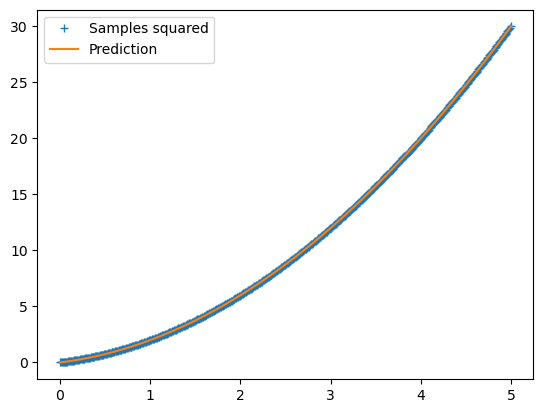

In [24]:
functions = []
function_names = []

n_data_points = 500 

x = np.linspace(0, 5, n_data_points).reshape(n_data_points,1)
y = ((x**2 + x)**(1/2)).flatten()


# The loss function needs to include 3 parameters:
# - y_pred: the prediction of the model
# - y: The "target" in general; This is the only parameter that is directly chosen as an input by the user, as part of the function .fit(x, y).
# - coefficients: the coefficients of ParFam. Usually this is interesting for regularization. Note, that it is only used during training and not testing,
#                 therefore, it is important to include the case that coefficients=None.
def custom_loss(y_pred, y, coefficients):
    if coefficients is None:
        reg = 0
    else: 
        reg = torch.norm(coefficients, p=1)
    return torch.norm(y_pred - y**2, p=2) / torch.norm(y, p=2) + 0.001 * reg

parfam = ParFamWrapper(config_name='small', iterate=False, degree_input_denominator=0, degree_output_denominator=0, function_names=function_names, functions=functions, 
                        degree_output_numerator=4, maximal_potence=4)
parfam.fit(x=x, y=y, custom_loss=custom_loss)

y_pred = parfam.predict(x)

plt.plot(x, y**2, '+', label='Samples squared')
plt.plot(x, y_pred, label='Prediction')
plt.legend()

In [25]:
parfam.get_formula(['x'])

1.0*x**2 + 1.0*x